In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline
import zhu_draw as zd
import zhu_contour as zc
import zhu_symmetry as zs
import imp
from matplotlib import pyplot as plt

In [6]:
import numpy as np
for m in [zc, zd, zs]:
    imp.reload(m)

In [8]:
from time import time


def analize(u, u_img, n_mult=2):
    start = time()
    q, (p, v) = zs.find_sym(u, n_mult=n_mult)
    t = time() - start
    theta = np.angle(v)
    p1, p2 = zs.axis_points(u_img, p, v)
    u_new, vec, scale = zc.preprocess(zc.fix_period(u, n_mult))
#     zd.prepare_scene(9, 4)
#     zd.draw_contour('plt', u)
#     zd.draw_contour('plt', zc.preprocess_inverse(u_new, vec, scale),
#                     p, v, label='new U', point_marker='bo',
#                     edge_color='blue')
#     plt.title(f'coef = {round(n_mult, 2)}, Q = {round(q, 3)}')
#     plt.show()
    f_new = np.fft.fft(u_new)
    p_new = (p - vec) / scale
    sym_ind = zs.nearest_to_line(u_new, p_new, p_new + v)
    f_sym = zs.new_start_point(f_new, sym_ind)
#     zd.prepare_scene(9, 4)
#     zd.plot_descriptor(f_sym, theta)
#     plt.title(f'p = {round(p_new, 1)}, theta = {round(theta, 2)}')
#     plt.show()
    return q, p1, p2, theta, t, len(u_new)


folder = 'data/to_visapp/planes'
u_lists = zc.from_folder(folder, get_all=False, from_txt=True)
n_mult_list = np.arange(0.1, 5.1, 0.1)
qs, re_p1s, im_p1s, re_p2s, im_p2s, ths, ts, ns = {}, {}, {}, {}, {}, {}, {}, {}
true_q, true_re_p1, true_im_p1, true_re_p2, true_im_p2, true_th, true_time, true_n = \
    {}, {}, {}, {}, {}, {}, {}, {}
for name_txt in u_lists:
    name = name_txt[:-4]
    print(name)
    name_img = folder + '/' + name + '.bmp'
    u_img = zc.get_contours(name_img)[0]
    q, p1, p2, th, t, n = analize(u_img, u_img)
    true_q[name] = q
    true_re_p1[name] = np.real(p1)
    true_im_p1[name] = np.imag(p1)
    true_re_p2[name] = np.real(p2)
    true_im_p2[name] = np.imag(p2)
    true_th[name] = th
    true_time[name] = t
    true_n[name] = n
    u_txt = u_lists[name_txt][0]
    qs[name], re_p1s[name], im_p1s[name], re_p2s[name], \
        im_p2s[name], ths[name], ts[name], ns[name] = \
        [], [], [], [], [], [], [], []
    for n_mult in n_mult_list:
        q, p1, p2, th, t, n = analize(u_txt, u_img, n_mult)
        qs[name].append(q)
        re_p1s[name].append(np.real(p1))
        im_p1s[name].append(np.imag(p1))
        re_p2s[name].append(np.real(p2))
        im_p2s[name].append(np.imag(p2))
        ths[name].append(th)
        ts[name].append(t)
        ns[name].append(n)

1361.mask
226.mask
50.mask
59.mask
70.mask
895.mask
904.mask
A-10_Thunderbolt_015
B-2A_Spirit_015
B-52H_Stratofortress_270
C-135_Stratolifter_195
C-135_Stratolifter_255
C-17_GlobemasterIII_030
C-20_GulfstreamIII_210
C-20_GulfstreamIII_315
C-21_Learjet_285
C-21_Learjet_315
C-27_Spartan_060
C-5_Galaxy_120
camel


32:80: E501 line too long (80 > 79 characters)
33:80: E501 line too long (86 > 79 characters)


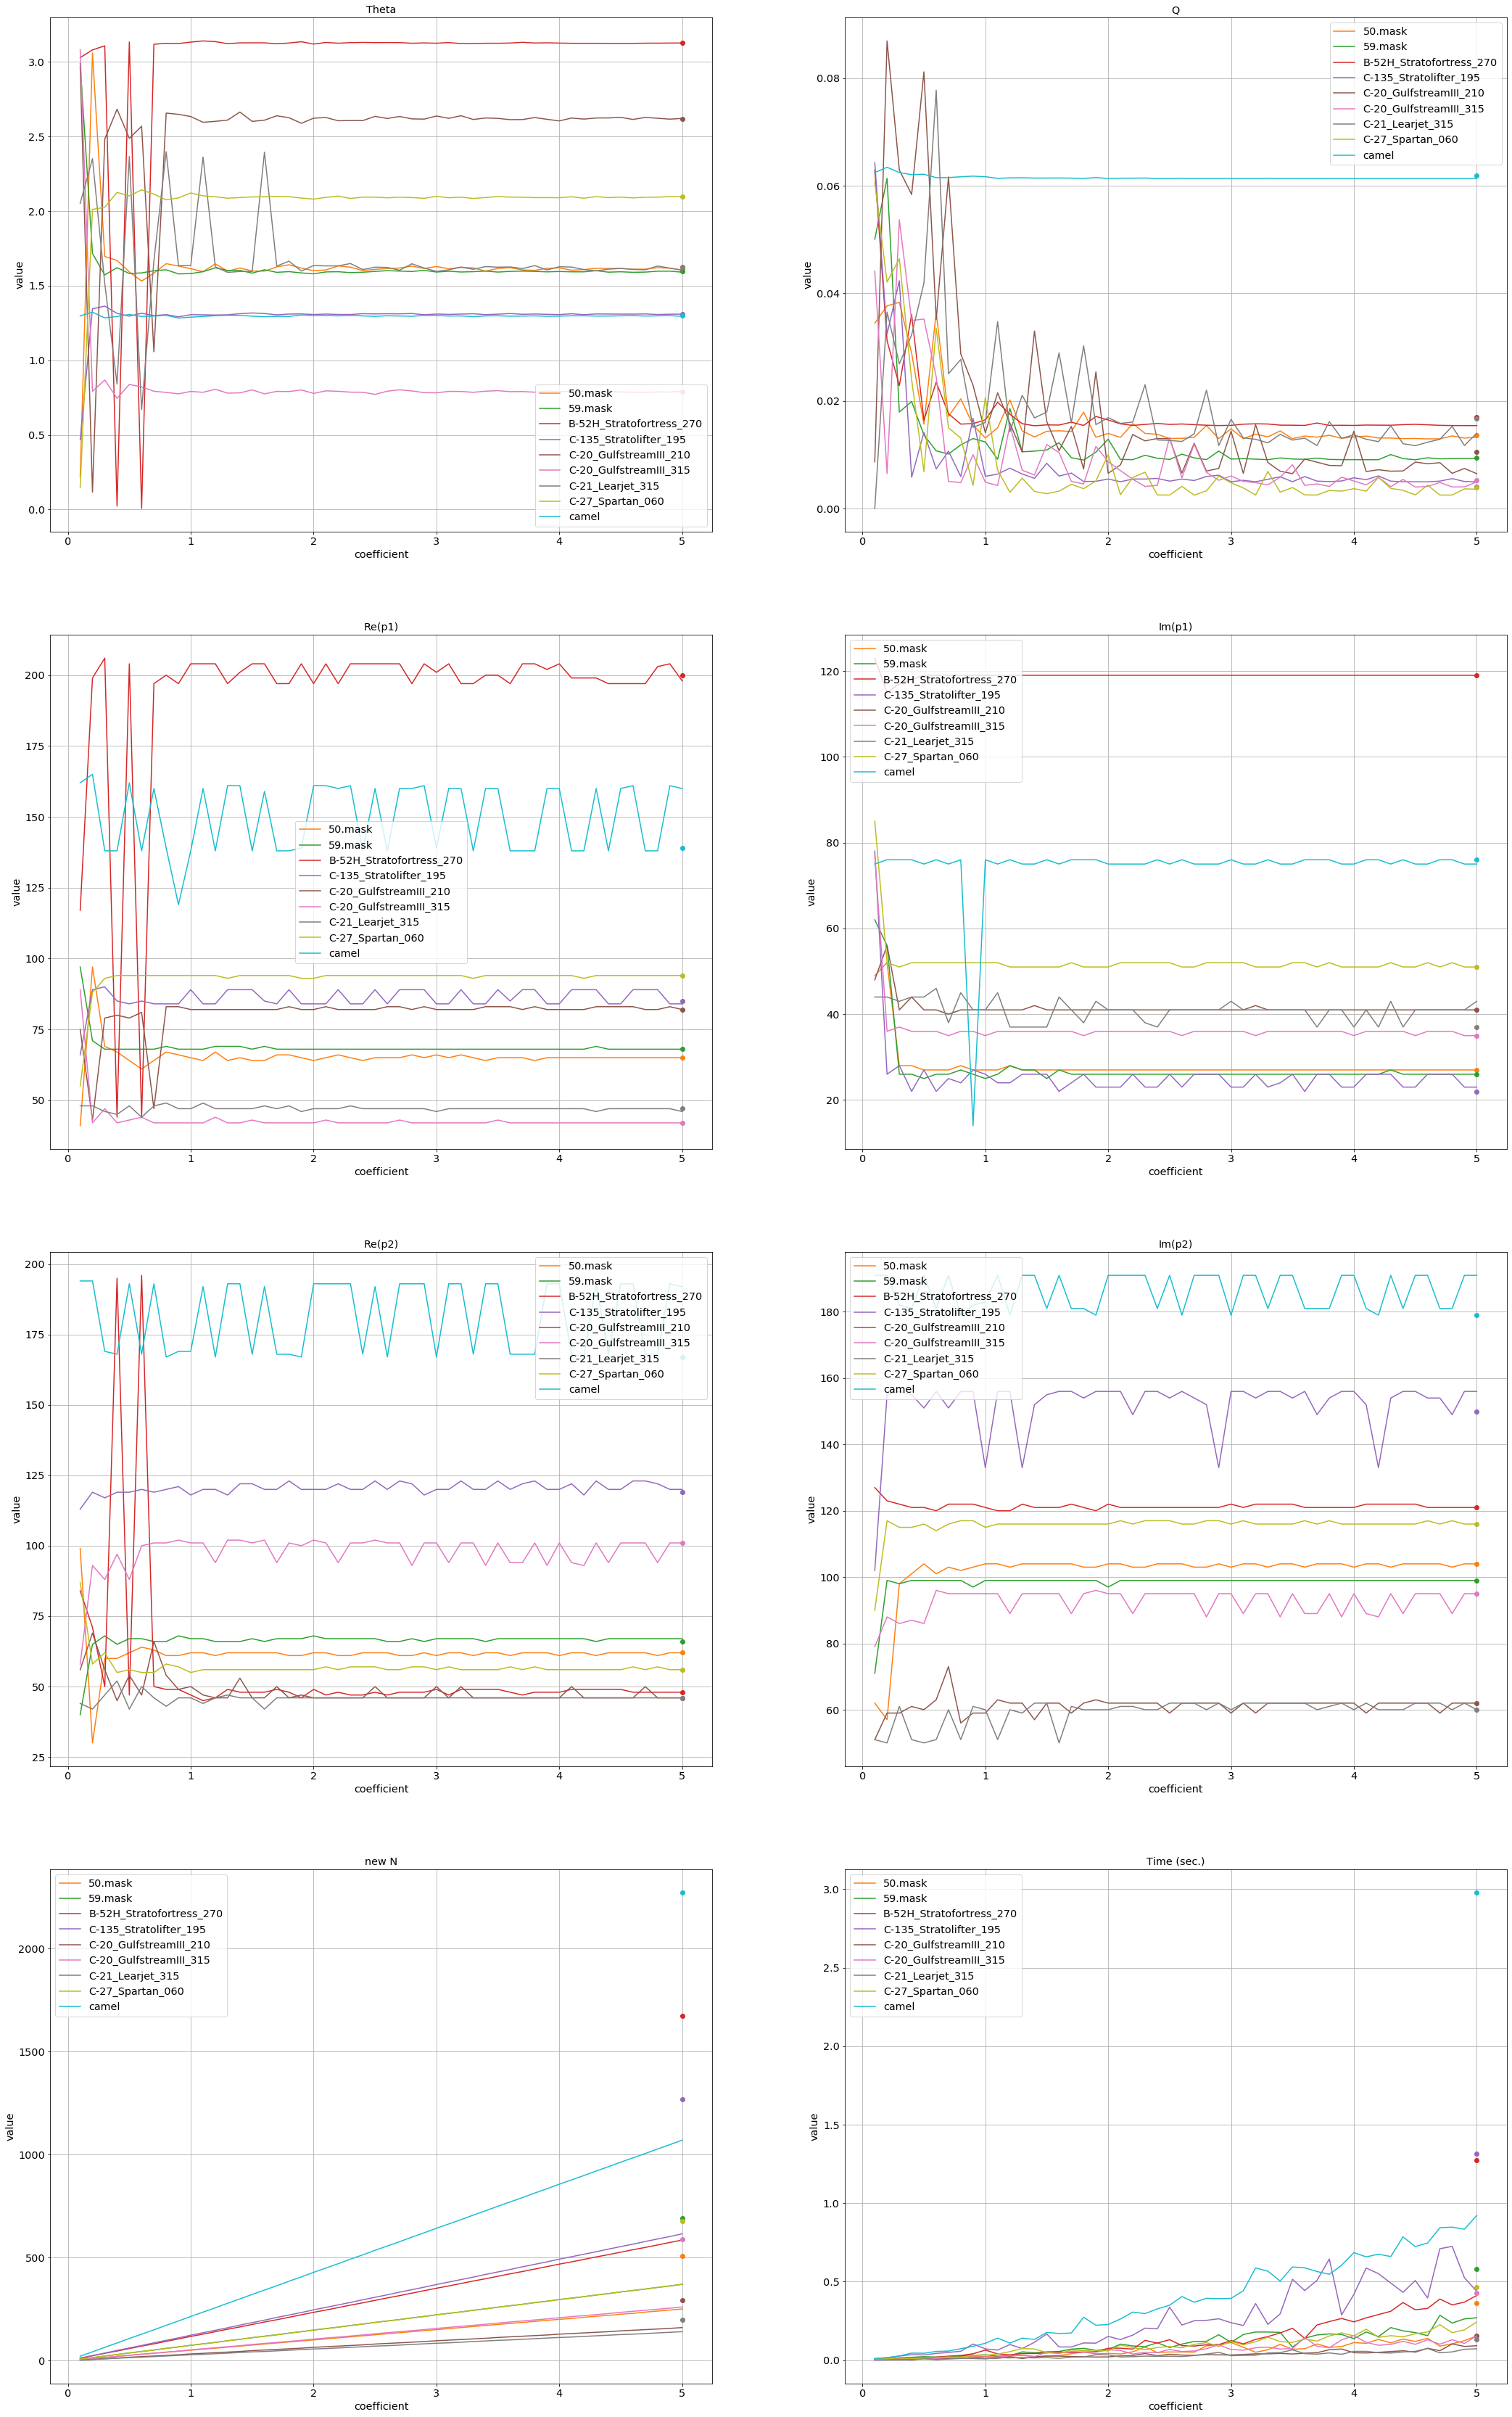

In [9]:
args = [
    (ths, true_th, 'Theta'),
    (qs, true_q, 'Q'),
    (re_p1s, true_re_p1, 'Re(p1)'),
    (im_p1s, true_im_p1, 'Im(p1)'),
    (re_p2s, true_re_p2, 'Re(p2)'),
    (im_p2s, true_im_p2, 'Im(p2)'),
    (ns, true_n, 'new N'),
    (ts, true_time, 'Time (sec.)')
]
all_keys = np.array(list(ts.keys()))
keys = all_keys.copy()
while 'camel' not in keys or '895.mask' in keys:
    keys = all_keys[np.sort(np.random.permutation(len(all_keys))[:9])]
cols = 2
rows = (len(args) + cols - 1) // cols
zd.prepare_scene()
fig, axs = plt.subplots(rows, cols,
                        figsize=(18*cols, 15*rows))
for i, (prop, true_prop, title) in enumerate(args):
    row = i // cols
    col = i % cols
    ax = axs[row][col]
    ax.set_xlabel('coefficient')
    ax.set_ylabel('value')
    for i, key in enumerate(keys):
        ax.plot(n_mult_list, prop[key], color='C'+str(i+1), label=key)
        ax.plot([n_mult_list[-1]], [true_prop[key]], 'o', color='C'+str(i+1))
    ax.set_title(title)
    ax.legend()
    ax.grid()
zd.savefig('n_mult_changing')
plt.show()

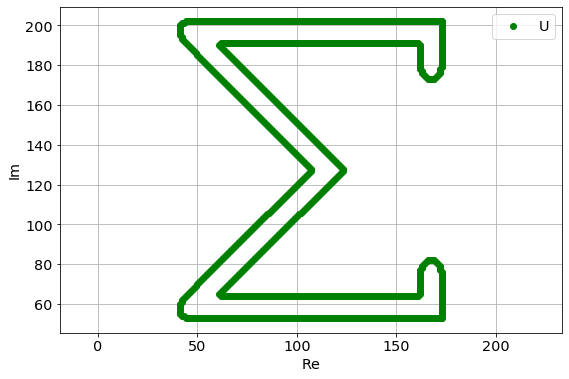

In [12]:
path = "data/truesym_examples/sigma.bmp"
for u in zc.get_contours(path):
    zd.draw_contour('plt', u)
    plt.show()

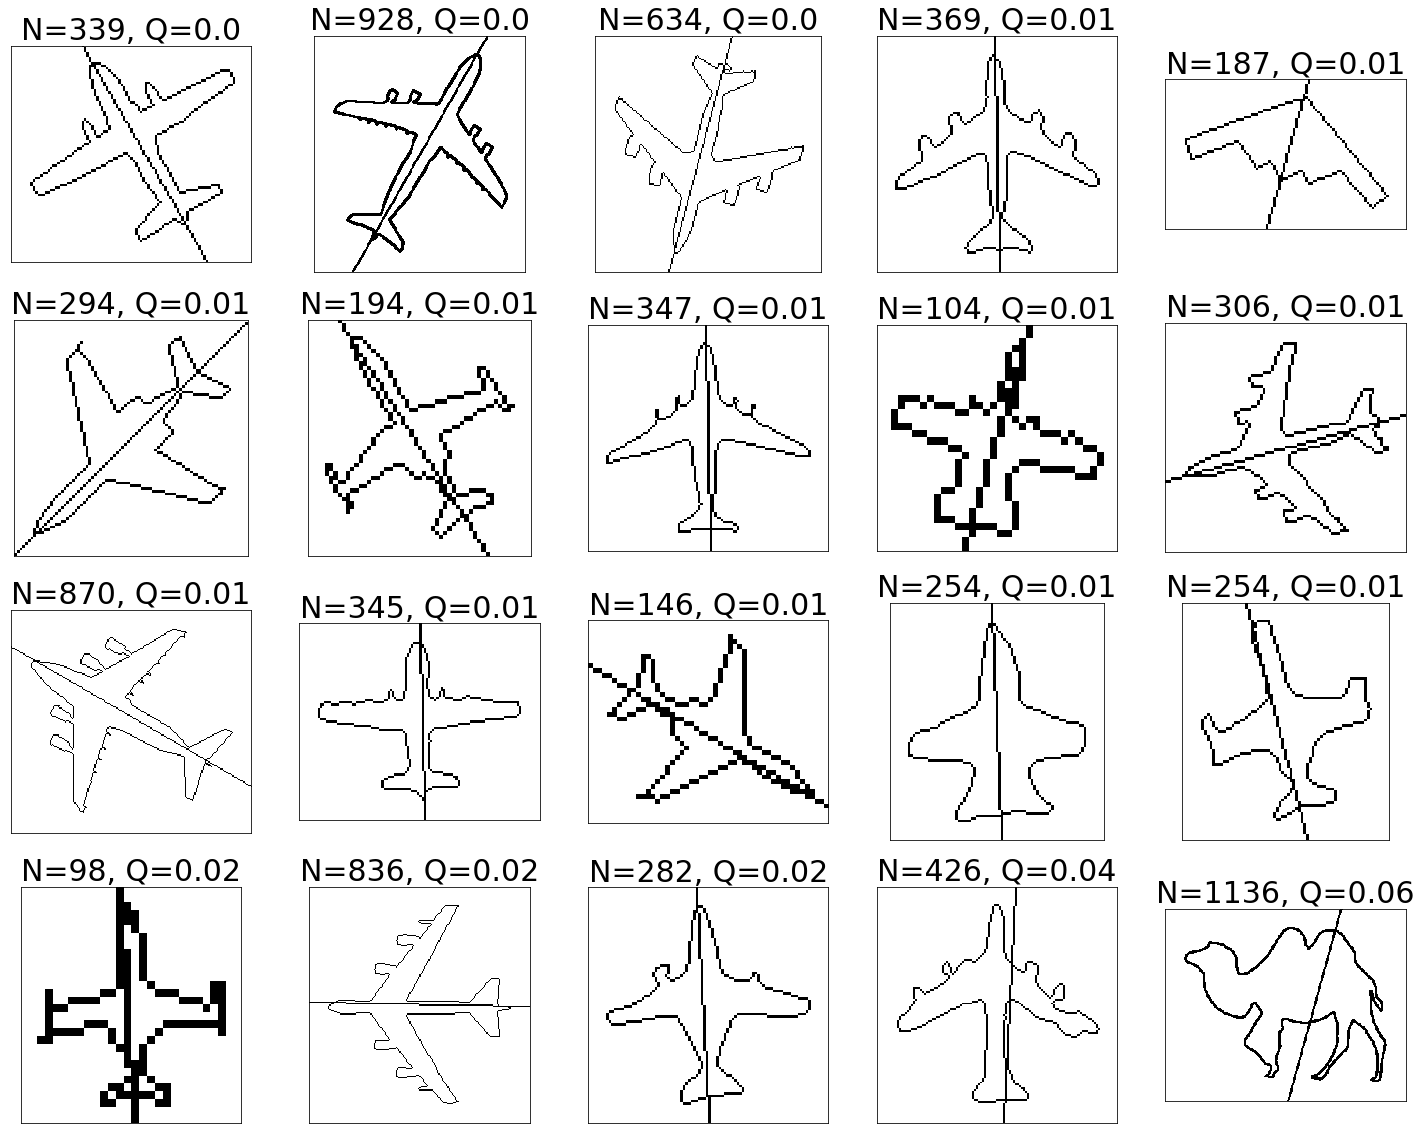

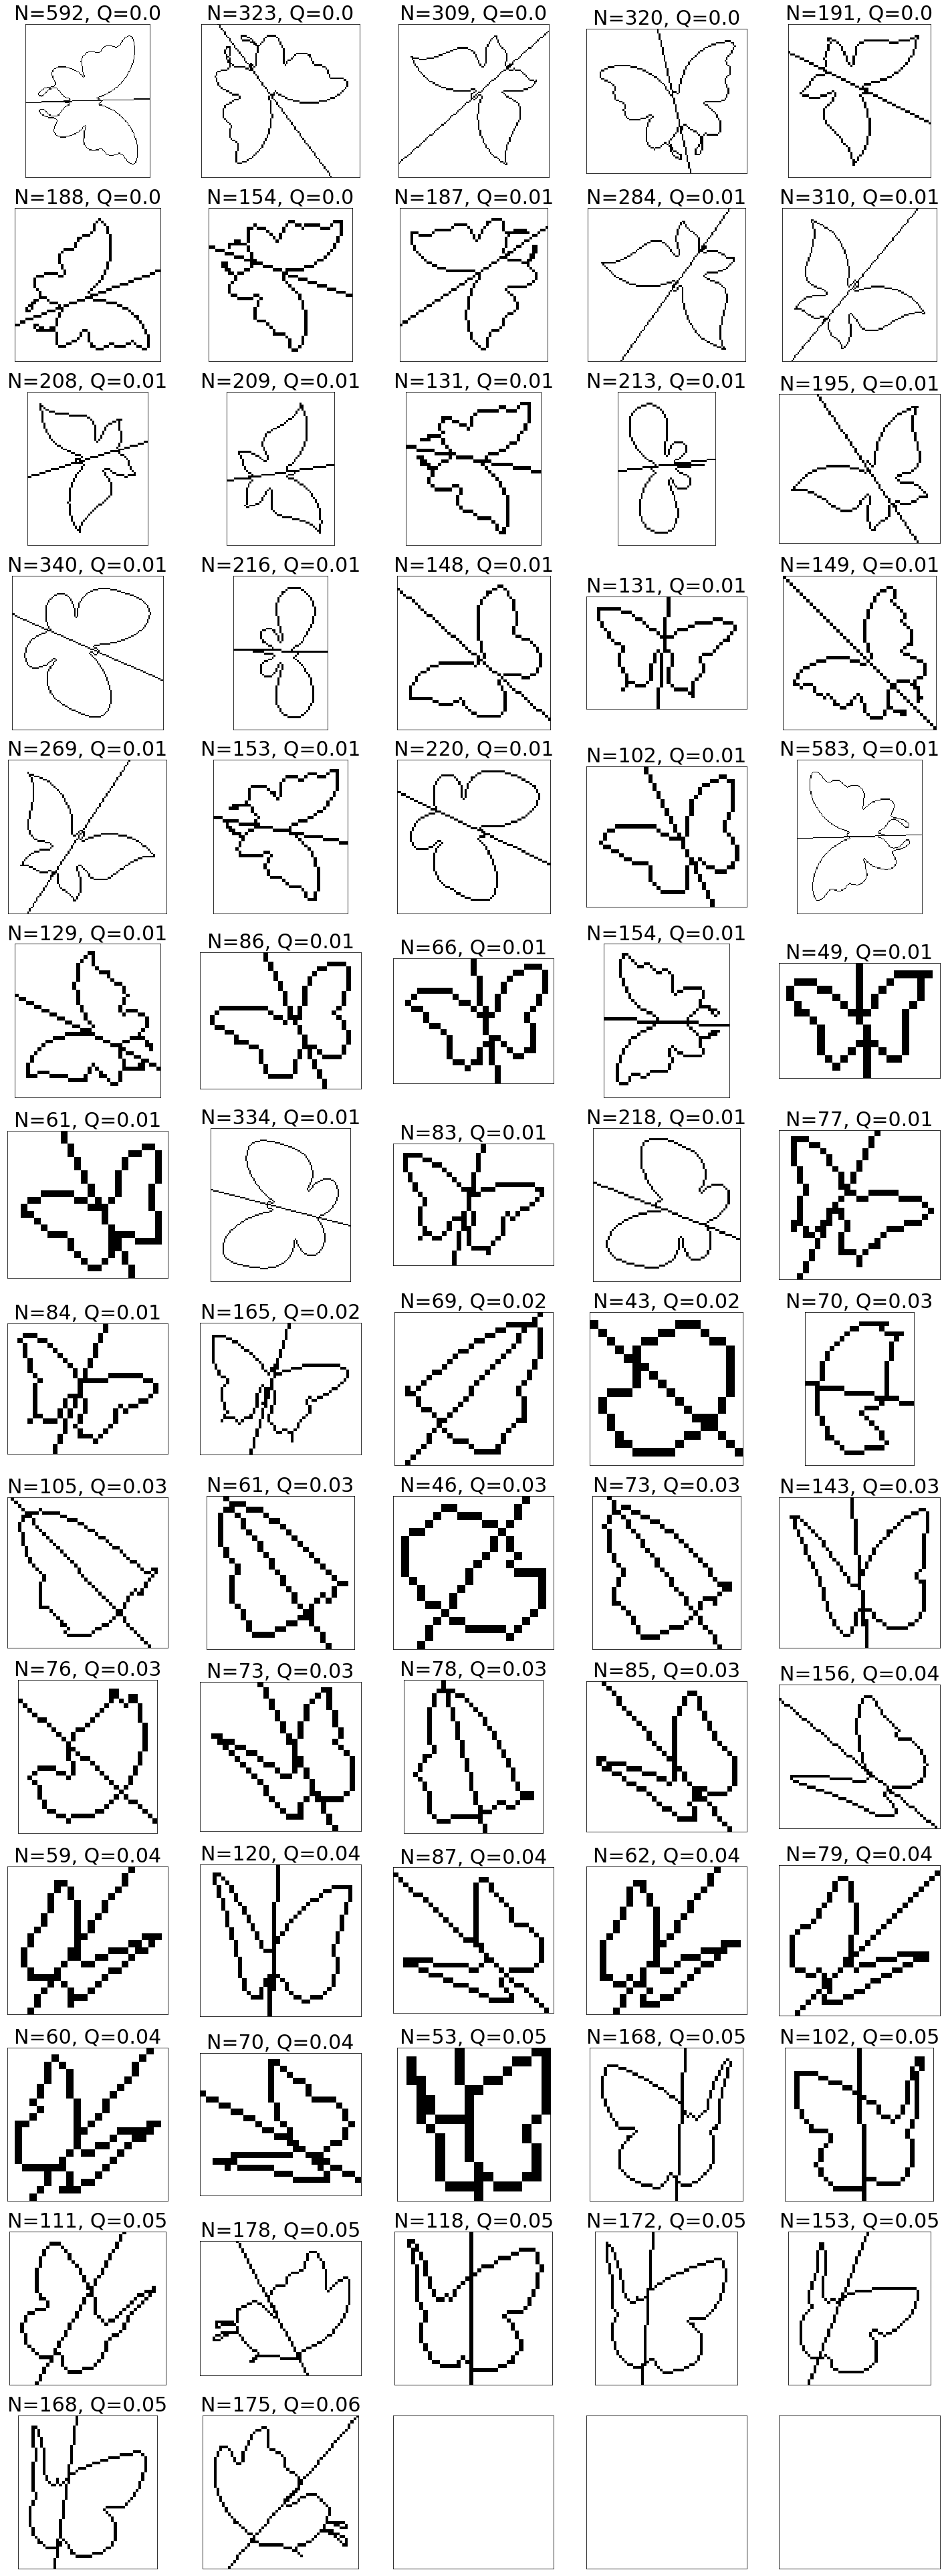

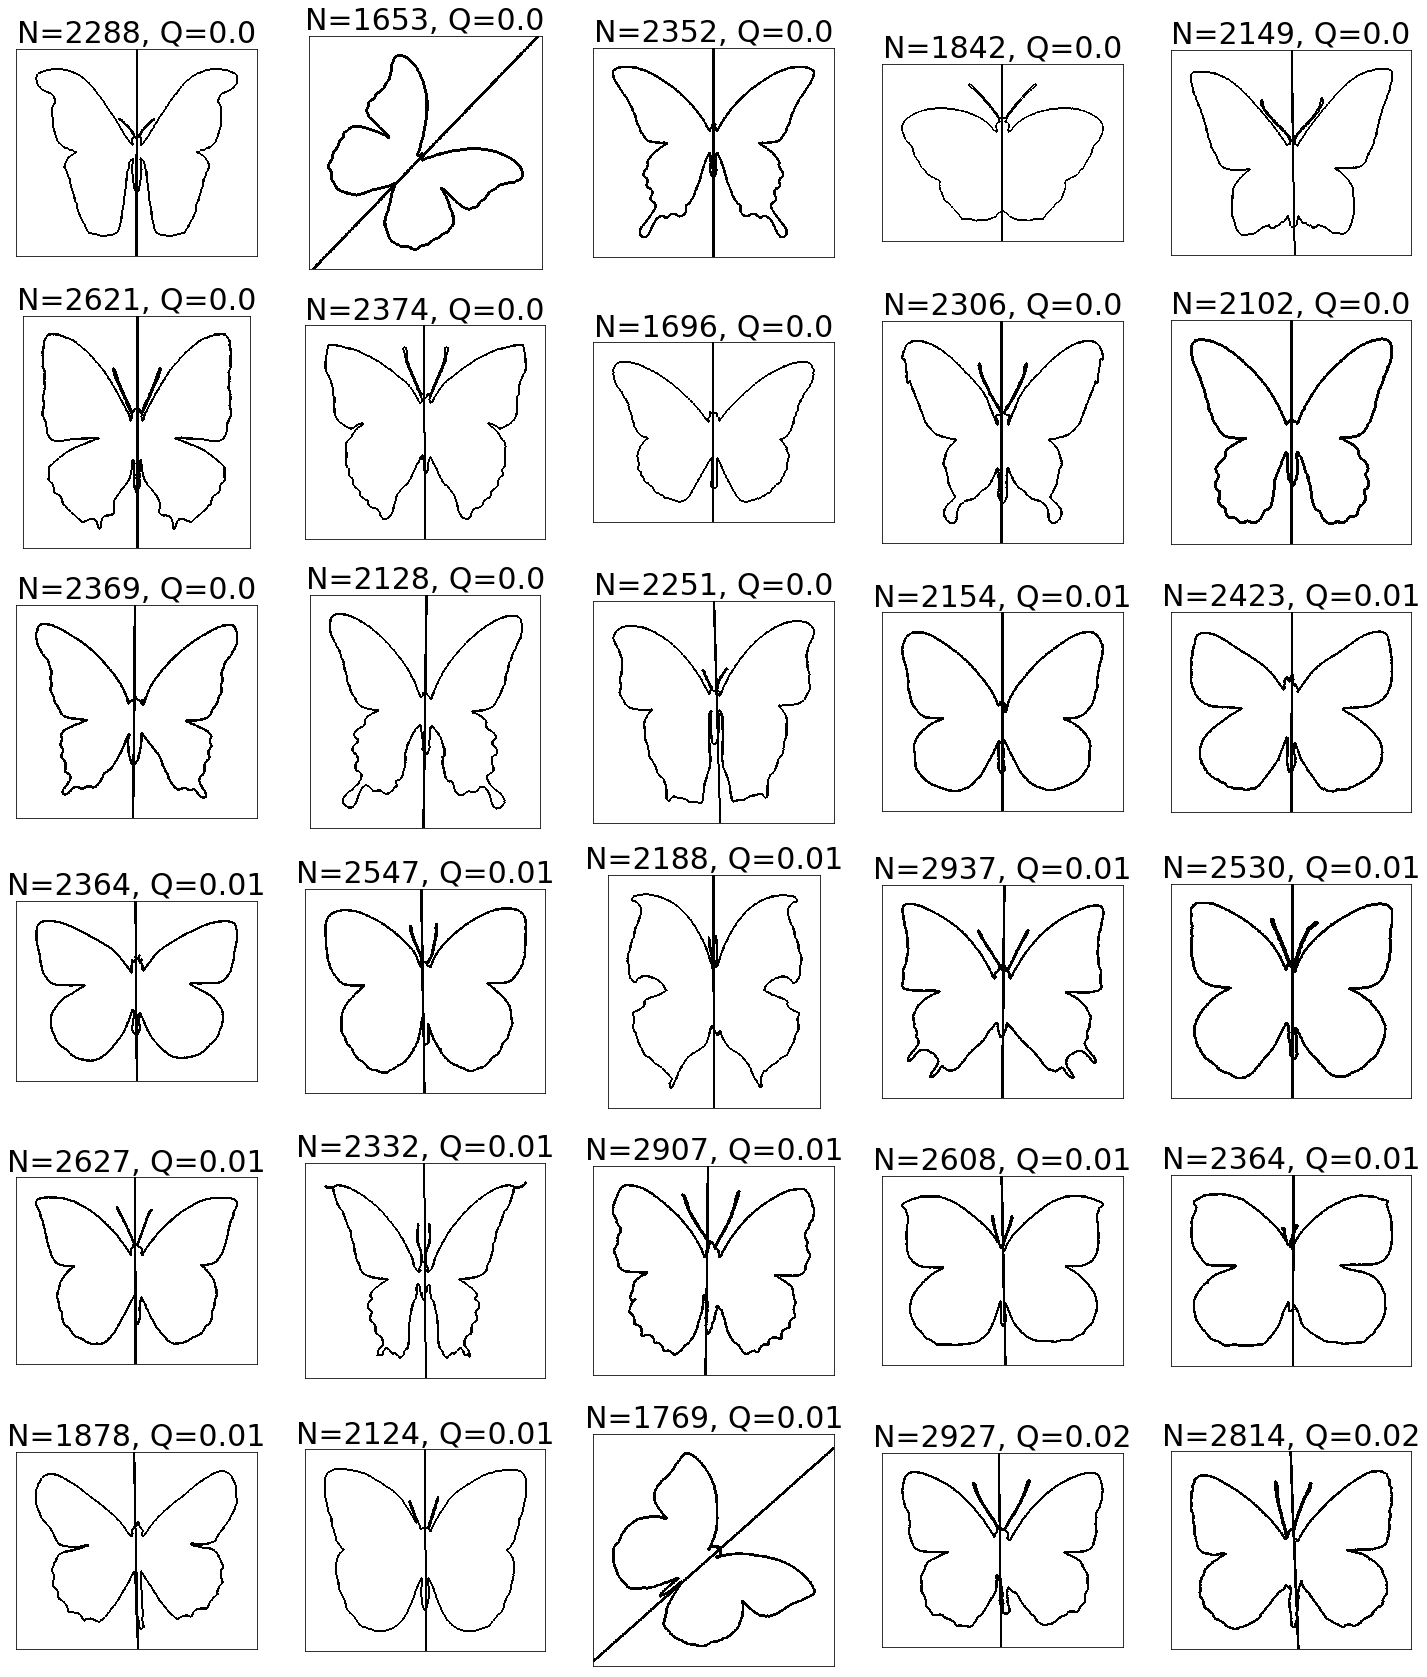

In [11]:
folders = [
    'data/to_visapp/planes',
    'data/to_visapp/many',
    'data/butterfly'
]
for folder in folders:
    zd.subploter(zs.get_drawing_args(folder))
    zd.savefig(folder.split('/')[-1], fmt='png')
    plt.show()

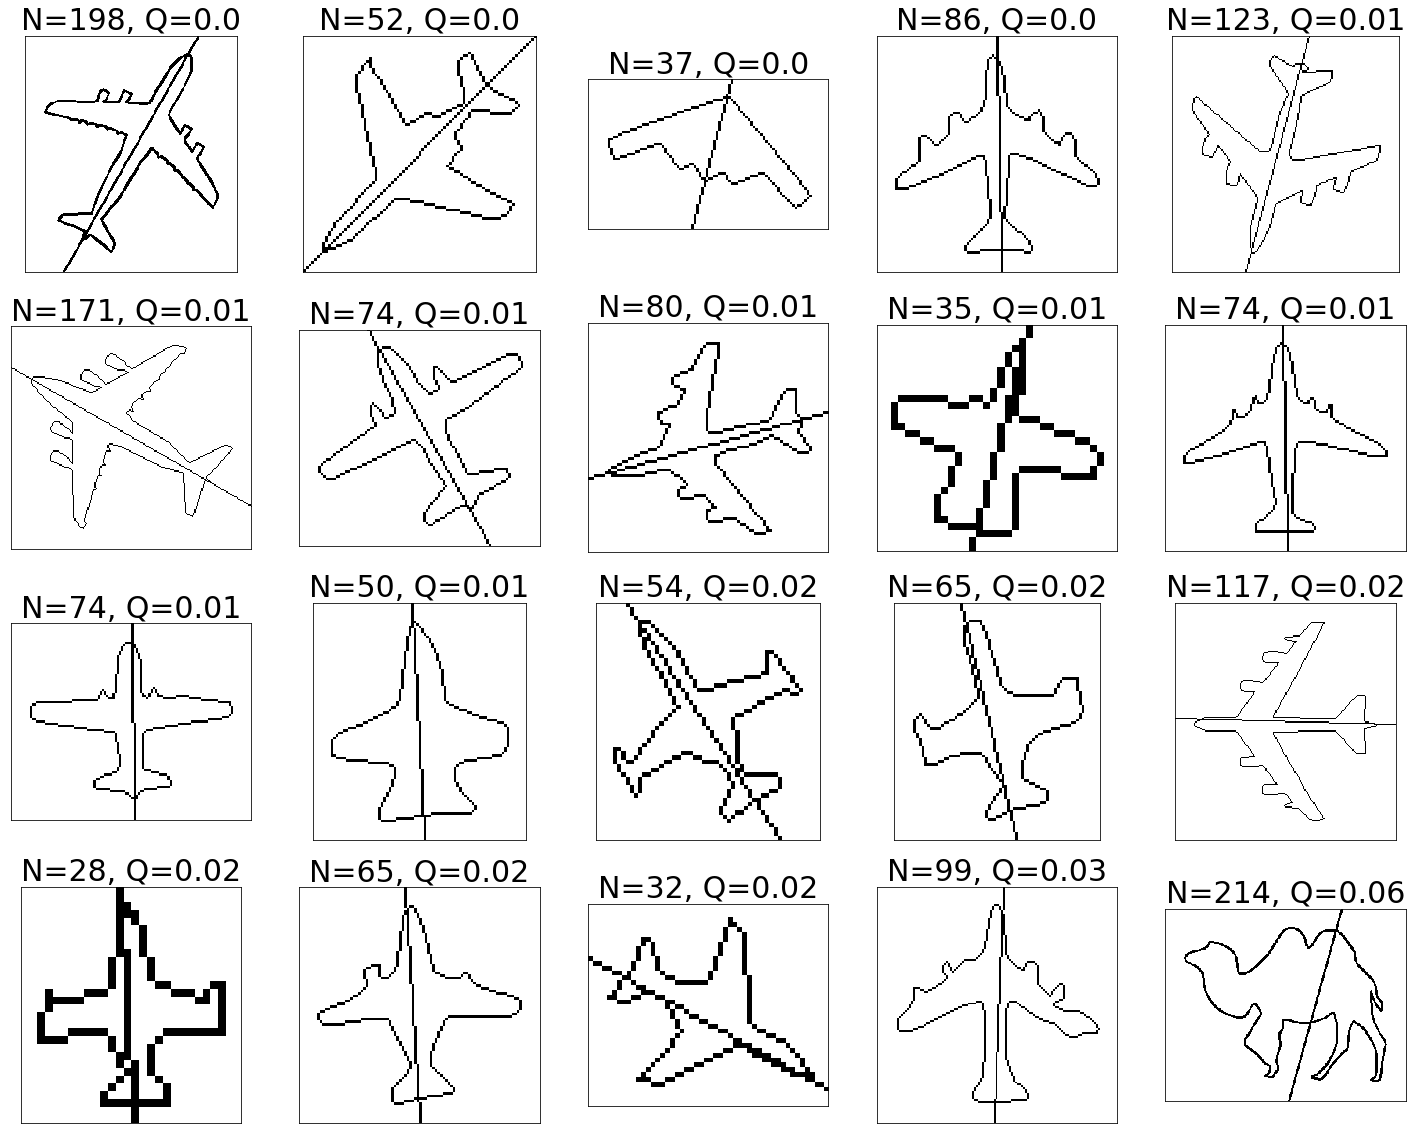

In [10]:
folder = 'data/to_visapp/planes'
zd.subploter(zs.get_drawing_args(folder, False, True))
zd.savefig(folder.split('/')[-1]+'_from_txt', fmt='png')